## CSSE COVID-19 Dataset

JHU CSSE에서는 아래 github repository를 통해 covid-19 현황을 매일 업데이트하고 있습니다.

- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

위의 데이터는 아래의 dashboard를 통해 시각화되어 공개되고 있기도 합니다.
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6



In [1]:
data_file = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

인터넷에 있는 csv파일도 pd.read_csv파일을 이용해 불러올 수 있습니다. 실시간으로 업데이트되는 데이터를 다룰 때에는 인터넷이나 DB에 접속하여 데이터를 가져와야 할 것 입니다.

In [2]:
import pandas as pd
data = pd.read_csv(data_file)

이 데이터는 주, 나라, 위도, 경도에 대한 정보와 각 날짜별 확진자 숫자를 제공하고 있습니다. 우리나라는 143번째 줄(row)에 위치하는 것을 알 수 있습니다.

In [3]:
data[155:160]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
155,NaN,Jordan,31.240000,36.510000,0,0,0,0,0,0,...,383912,386496,391090,397158,402282,407617,413350,417934,421415,427717
156,NaN,Kazakhstan,48.019600,66.923700,0,0,0,0,0,0,...,261244,262093,262715,263396,264178,265028,265929,266803,267657,268327
157,NaN,Kenya,-0.023600,37.906200,0,0,0,0,0,0,...,105467,105648,105973,106125,106470,106801,107329,107729,108362,108827
158,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,89321,89676,90031,90372,90816,91240,91638,92055,92471,92817
159,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,68451,68451,68451,68451,70285,70853,70853,71444,72600,72600


In [4]:
inputs, outputs = data.iloc[:,[0,1,2,3,]], data.iloc[:,-1]
inputs[155:160]

,Province/State,Country/Region,Lat,Long
155,NaN,Jordan,31.240000,36.510000
156,NaN,Kazakhstan,48.019600,66.923700
157,NaN,Kenya,-0.023600,37.906200
158,NaN,"Korea, South",35.907757,127.766922
159,NaN,Kosovo,42.602636,20.902977


In [5]:
outputs[155:160]

155    427717
156    268327
157    108827
158     92817
159     72600
Name: 3/7/21, dtype: int64

In [6]:
from matplotlib import pyplot as plt
import numpy as np

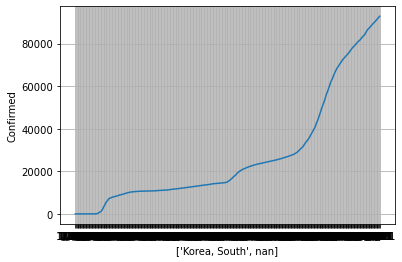

In [7]:
n = 158 # 158: South Korea
fig=plt.figure()
ax=fig.gca()
ax.plot(data.iloc[n,4:])
ax.set_xlabel([data.iloc[n,1],data.iloc[n,0]])
ax.set_ylabel('Confirmed')
ax.grid('both')

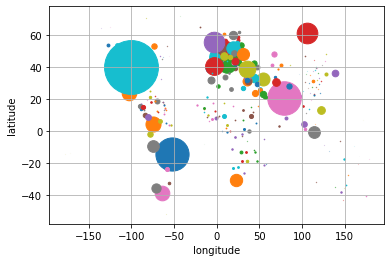

In [8]:
fig=plt.figure() 
ax=fig.gca()
for n in range(len(inputs)):
  ax.scatter(inputs.iloc[n,3],inputs.iloc[n,2],s=outputs.iloc[n]/1e4)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid('both')